In [23]:
%load_ext autoreload
%autoreload 2
from dataset import iterable_dataset, vae_feature_dataset
from models.music_generation_gru import MusicGRU
import os
from utils import training_rnn, data_reading
import torch
from torch.utils.data import DataLoader
import pickle
import matplotlib.pyplot as plt
from utils import data_reading, music_generation
from models import feature_prediction_gru
from dataset import iterable_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
FEATURE_DIRPATH = "./saved_model_and_data/transformed_features/strings"
TRAIN_SPLIT = 0.95
SEQ_LEN = 48
RESOLUTION = 12
TRACK_ORDER = ["Strings", "Piano"]
FILES_TO_READ = 99999
BATCH_SIZE = 64
LATENT_SIZE = 513
HIDDEN_SIZE = 512
N_LAYER = 3
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LR_LAMBDA = 1
LR = 0.0001
ALPHA = 0
AUTO_SAVE = False
SAVE_ON_EPOCH = 1

In [32]:
all_feature_files = data_reading.read_all_npys(FEATURE_DIRPATH, True)

In [33]:
train_len = round(len(all_feature_files)*TRAIN_SPLIT)
train_files_list = all_feature_files[:train_len]
test_files_list = all_feature_files[train_len:]

In [34]:
train_dataset = vae_feature_dataset.IterableSongDataset(train_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
test_dataset = vae_feature_dataset.IterableSongDataset(test_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, drop_last=True)

In [36]:
model = feature_prediction_gru.FeaturePredictionGRU(["Strings"], LATENT_SIZE, HIDDEN_SIZE, BATCH_SIZE, N_LAYER, DEVICE).to(DEVICE)

In [37]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: LR_LAMBDA ** epoch)
criterion = torch.nn.MSELoss()

In [45]:
EPOCH = 30
train_losses, test_losses = training_rnn.training_rnn(model, optimizer, scheduler, criterion, train_loader, test_loader, EPOCH, DEVICE, BATCH_SIZE, 
                         ALPHA, AUTO_SAVE, SAVE_ON_EPOCH)

[0.0001]
start test
Epoch 1, Train Loss: 0.2780121477294307, Test Loss: 0.32570522075349634, Time: 2022-04-26 14:26:46.348087
[0.0001]
start test
Epoch 2, Train Loss: 0.2758669878634231, Test Loss: 0.3248292316089977, Time: 2022-04-26 14:26:58.158087
[0.0001]
start test
Epoch 3, Train Loss: 0.27421075239848186, Test Loss: 0.3238027177073739, Time: 2022-04-26 14:27:09.978087
[0.0001]
start test
Epoch 4, Train Loss: 0.2723849830681114, Test Loss: 0.32361351224509155, Time: 2022-04-26 14:27:21.894091
[0.0001]
start test
Epoch 5, Train Loss: 0.2703710160266732, Test Loss: 0.3231625380841168, Time: 2022-04-26 14:27:34.114589
[0.0001]
start test
Epoch 6, Train Loss: 0.2680501030378432, Test Loss: 0.3214053606445139, Time: 2022-04-26 14:27:46.034590
[0.0001]
start test
Epoch 7, Train Loss: 0.2658133927326632, Test Loss: 0.3214533166451888, Time: 2022-04-26 14:27:57.964087
[0.0001]
start test
Epoch 8, Train Loss: 0.26356081110182533, Test Loss: 0.32159235260703345, Time: 2022-04-26 14:28:09.97

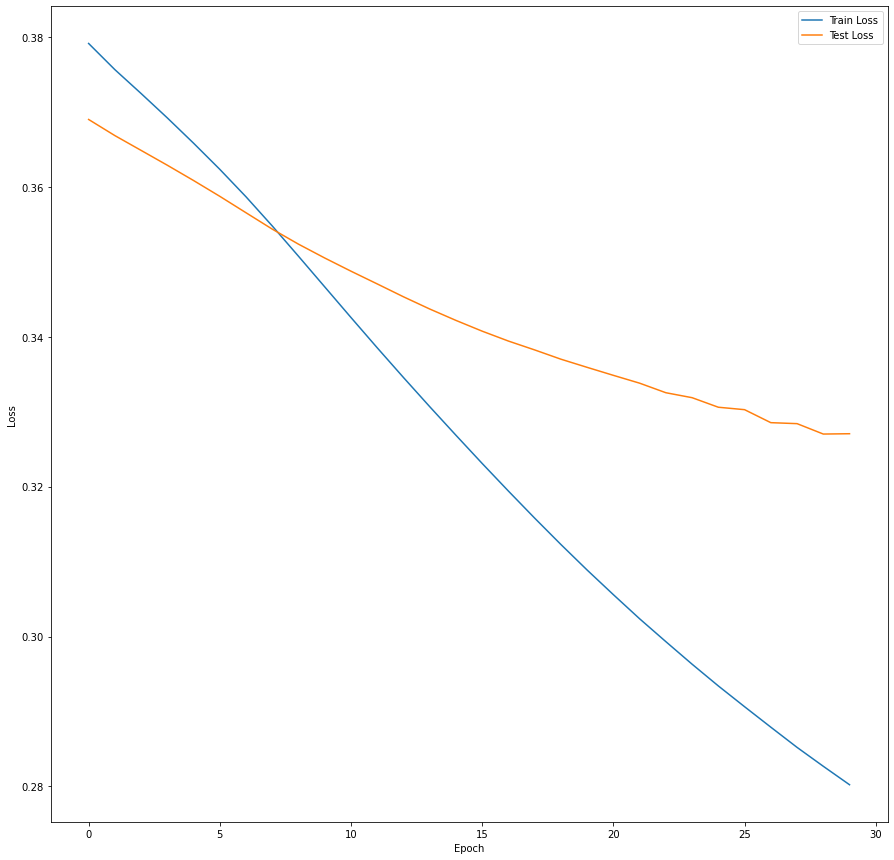

In [44]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [47]:
STRINGS_SAVE_PATH = f"./saved_model_and_data/learner/strings_based_on_piano/string_learner_epoch60"
torch.save(model.state_dict(), STRINGS_SAVE_PATH) 